# SyriaTel Customer Churn

## Business Understanding

SyriaTel operates in a competitive telecom market where retaining existing customers is more cost-effective than acquiring new ones. All available customers are sure to have existing service providers. The real difference is market  share which is more easier to lose than to gain. A user may change to another network to get more value for money but the most critical is reliability.  High churn directly impacts profitability, market share, and customer lifetime value (CLV). SyriaTel requires a reliable way to anticipate which customers are most likely to leave, so proactive retention strategies can be applied.

### Problem Statement

Customer churn is a revenue-critical issue for SyriaTel. Without early detection of at-risk customers, the company loses not only recurring revenue but also faces higher acquisition costs. This project develops machine learning models to predict churn using historical customer behavior and service data.

### Objectives

1. To Build and compare two machine learning model, that is Logistic Regression and Random Forest.

2. Identify key factors influencing churn.

3. Provide actionable business recommendations to reduce churn.

## Methodology and Metrics of success

Exploratory Data Analysis (EDA): Investigated patterns in churn vs. usage behavior.

Feature Engineering & Scaling: Removed redundant features (charges), handled class imbalance (SMOTE), and scaled predictors.

Modeling Approaches:

Logistic Regression: Provided coefficient-based interpretability, showing the direction and magnitude of churn drivers.

Random Forest: Offered robust predictive performance, captured nonlinear interactions, and ranked feature importance.

Evaluation Metrics: Accuracy, precision, recall, F1-score, and ROC-AUC, with stratified train-test split to preserve churn distribution.

In [1]:
# Import
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

#import sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler




In [2]:
#load and read the dataset
data = pd.read_csv("churn.csv")
# check the head
data[:5]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check the tail
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
#shape
print(f" The dataset has {data.shape[0]} records and {data.shape[1]} columns")

 The dataset has 3333 records and 21 columns


In [5]:
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#concise stat summary

data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#check unique values

for coln in data:
    uni_vale =data[coln].unique()
    print(f" {coln}\n, {uni_vale}\n")

 state
, ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

 account length
, [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 13

In [8]:

(data['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64

The data set is appropriate for analysis to obtain actionable information about the companies chun rates. However, there is a limitation, namely, class imbalance. The frequency difference between the count of False and True values in the varaiable churn. 

## Data Preparation
### Data Cleaning

In [9]:
# Copy
df1=data.copy(deep=True)

In [10]:
# check null values
df1.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

This make the work easier as there are no missing values in anay of the columns

In [11]:
#check duplicates
df1.duplicated().sum()

0

In [12]:
# columns to drop
colns=df1[["phone number","area code","state"]]
# drop columns
df1=df1.drop(colns,axis=1)

In [13]:
df1.columns.tolist()

['account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

## Data Exploration Analysis


In [14]:
#preocess the categorical columns
cat = df1.select_dtypes("object")
cat_dumm = pd.get_dummies(cat, drop_first=True, dtype="int")
cat_dumm

,international plan_yes,voice mail plan_yes
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
3328,0,1
3329,0,0
3330,0,0
3331,1,0


In [15]:
merged_df = pd.concat([df1, cat_dumm], axis=1)
merged_df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,1
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0,1
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0,0
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0,0
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,1,0


In [16]:
# Convert churn from bool to int (0/1)
merged_df["churn"] = merged_df["churn"].astype(int)

# Check unique values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [17]:
#Remove the original columns
merged_df.drop(cat, axis=1, inplace=True)
merged_df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


This is the final merged dataset. Now let's separate the features from the label

In [18]:
#seperate features from label
X = merged_df.drop("churn", axis=1)
y = merged_df["churn"]

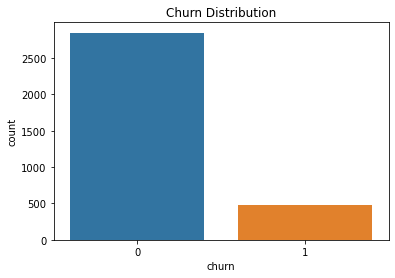

0    2850
1     483
Name: churn, dtype: int64


In [19]:
# Churn distribution
sns.countplot(x=y)
plt.title("Churn Distribution")
plt.show()

# Churn percentage
print(y.value_counts())

### Numerical Features vs. Churn

#### Correlation Between Churn & Numeric Predictors

Since the initial features are many, let's investigate correlation and multicollinearity.

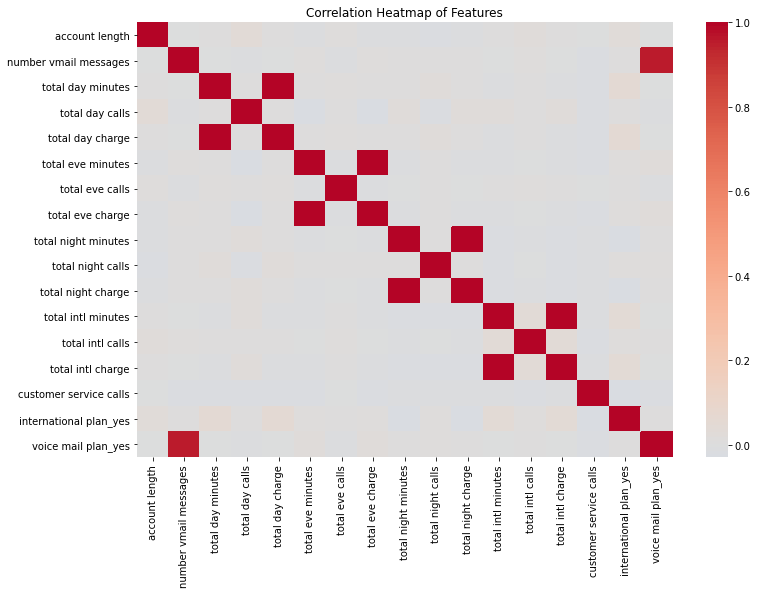

In [20]:
# Compute correlation matrix (numeric only)
corr_matrix = X.corr()

# Display correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

The charges columns (day/eve/night/intl) are almost perfectly correlated with their corresponding minutes columns because charge is derived directly from minutes and rate. Therefore, we have to drop the redudant feature, charge. But before that we can compare the features' to the label.

In [21]:

from scipy.stats import pointbiserialr

for col in X:
    corr, pval = pointbiserialr(X[col], y)
    print(f"{col}: correlation={corr:.3f}, p-value={pval:.4f}")

account length: correlation=0.017, p-value=0.3398
number vmail messages: correlation=-0.090, p-value=0.0000
total day minutes: correlation=0.205, p-value=0.0000
total day calls: correlation=0.018, p-value=0.2867
total day charge: correlation=0.205, p-value=0.0000
total eve minutes: correlation=0.093, p-value=0.0000
total eve calls: correlation=0.009, p-value=0.5941
total eve charge: correlation=0.093, p-value=0.0000
total night minutes: correlation=0.035, p-value=0.0405
total night calls: correlation=0.006, p-value=0.7230
total night charge: correlation=0.035, p-value=0.0405
total intl minutes: correlation=0.068, p-value=0.0001
total intl calls: correlation=-0.053, p-value=0.0023
total intl charge: correlation=0.068, p-value=0.0001
customer service calls: correlation=0.209, p-value=0.0000
international plan_yes: correlation=0.260, p-value=0.0000
voice mail plan_yes: correlation=-0.102, p-value=0.0000


We can confirm that charge and minutes having similar correlation on the dependent variable using point-biserial correlation coefficient statistical measure used to determine the relationship between a dichotomous variable.  Let's now drop them. 

Using VIF to select which to drop, it is evident that it has to be charge, since it has higher VIF value in day,evening, night and international.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Compute VIF
X_vif = X
vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

                   feature           VIF
0           account length  7.197958e+00
1    number vmail messages  1.607146e+01
2        total day minutes  1.246201e+08
3          total day calls  2.178360e+01
4         total day charge  1.246245e+08
5        total eve minutes  3.738593e+07
6          total eve calls  2.198522e+01
7         total eve charge  3.738689e+07
8      total night minutes  1.071873e+07
9        total night calls  2.227654e+01
10      total night charge  1.071845e+07
11      total intl minutes  9.980961e+05
12        total intl calls  4.254404e+00
13       total intl charge  9.984868e+05
14  customer service calls  2.377890e+00
15  international plan_yes  1.116301e+00
16     voice mail plan_yes  1.645595e+01


In [23]:
# Drop redundant 'charge' columns
X = X.drop(columns=[
    "total day charge",
    "total eve charge",
    "total night charge",
    "total intl charge"
])

print("Remaining columns:", X.columns.tolist())

Remaining columns: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls', 'international plan_yes', 'voice mail plan_yes']


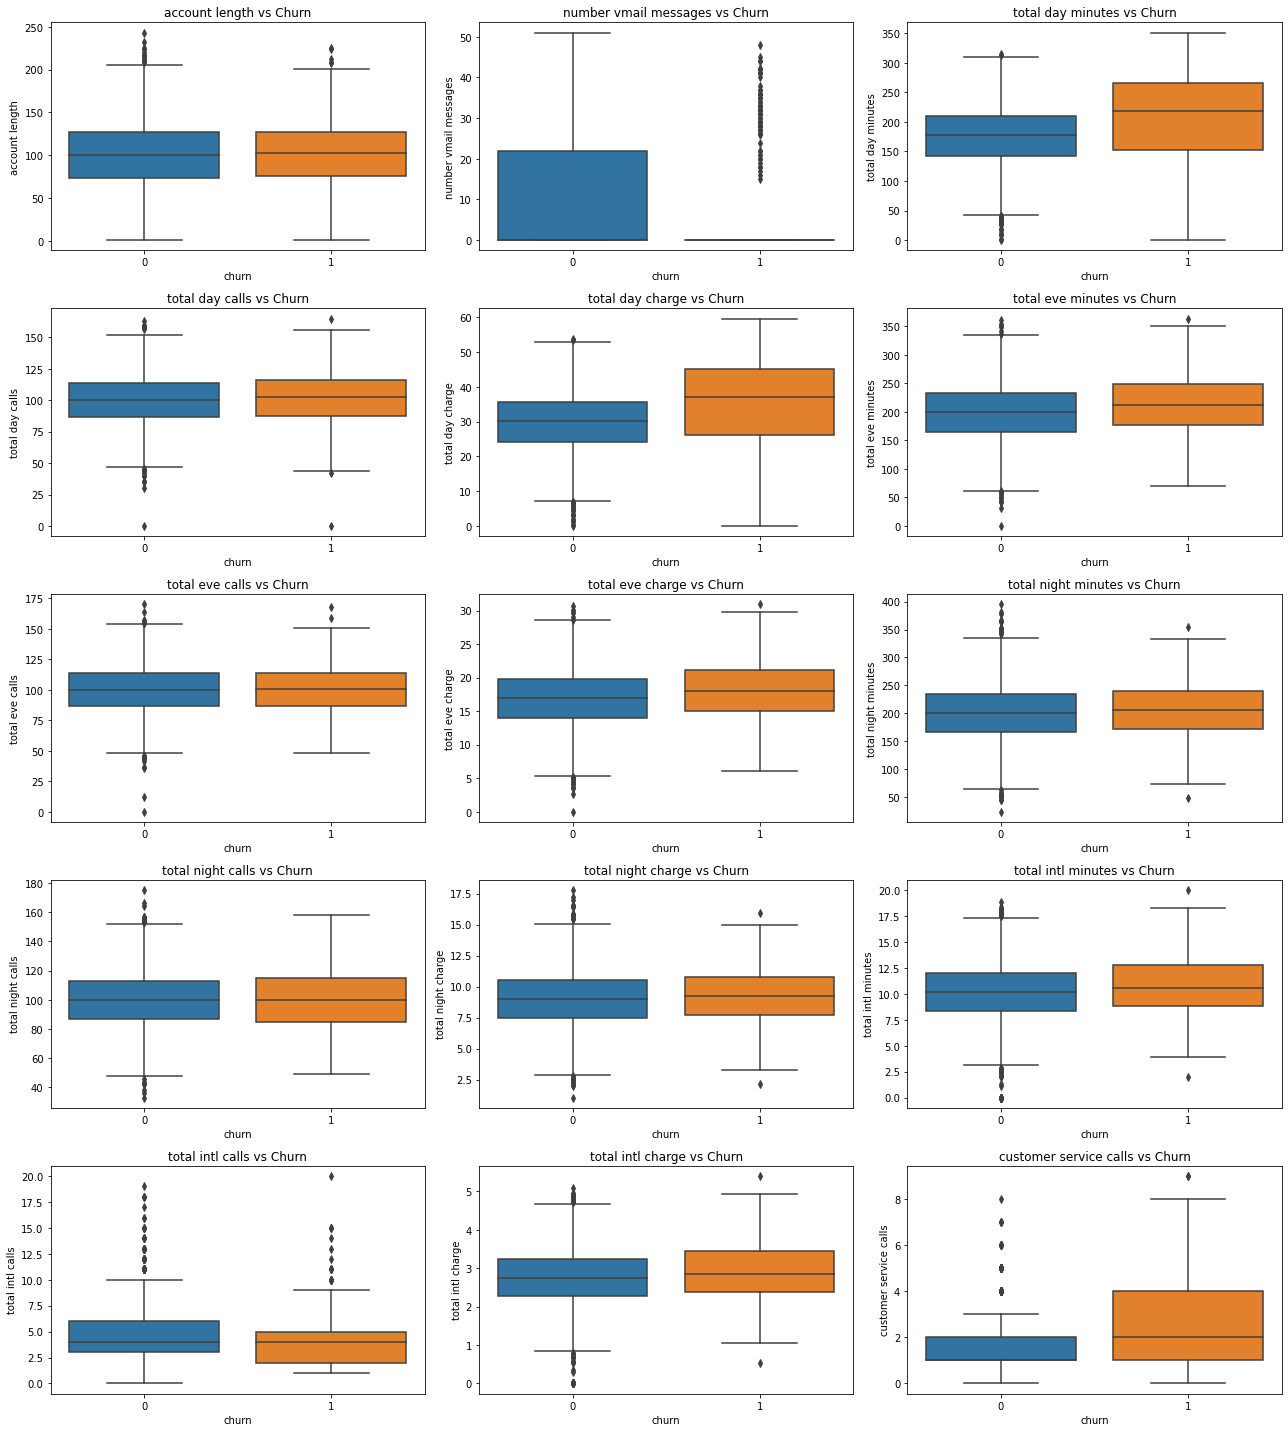

In [23]:
# create grid
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist() # Example to create the list if you don't have it
n_cols = 3
n_rows = (len(num_cols) // n_cols) + (1 if len(num_cols) % n_cols else 0) # This ensures we have enough rows

# Create the subplot grid based on the NUMBER OF FEATURES (len(num_cols)), not the number of samples in X
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy looping

# Loop through the list of numerical columns
for i, col in enumerate(num_cols):
    sns.boxplot(x=y, y=X[col], ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")

# Hide any unused axes if the total plots don't fill the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

There are no clear indicator of feature relevance. Therefore further investigation is required.

### Categorical Features vs. Churn

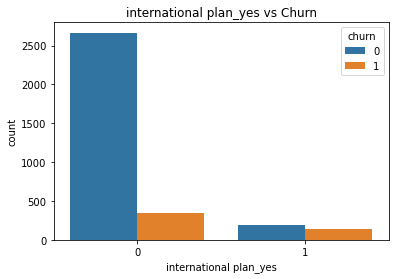

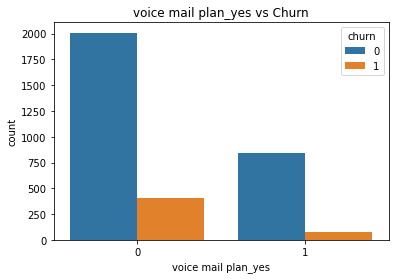

In [24]:
cat_cols = ['international plan_yes', 'voice mail plan_yes']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X[col], hue=y)
    plt.title(f"{col} vs Churn")
    plt.show()


To interpret these chart, I prefer to look at the proportion of churns of total customers with either international or voicemail plans. For those with international plans, almost half of the customer have churned while only less than a third of those without have churned.
Conversly, those without voice mail plans tend to churn more compared to those without a mail plan.

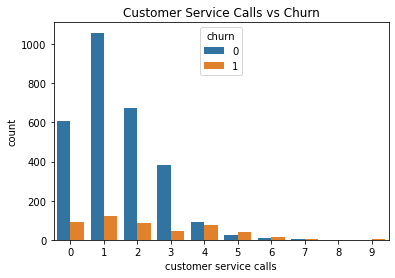

In [25]:
sns.countplot(x=X["customer service calls"], hue=y)
plt.title("Customer Service Calls vs Churn")
plt.show()


## Modelling

In [74]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2666, 13), (2666,), (667, 13), (667,))

In [78]:

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Logistic regression model

In [79]:
# Baseline Logistic Regression
logreg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
logmodel=logreg.fit(x_train_scaled, y_train)
y_pred_base = logmodel.predict(x_test_scaled)
y_prob_base = logmodel.predict_proba(x_test_scaled)[:, 1]

print("Baseline Logistic Regression")
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_base))

Baseline Logistic Regression
[[434 136]
 [ 25  72]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

ROC-AUC: 0.8151021884608429


The baseline Logistic Regression model demonstrates a significant trade-off, performing poorly on precision for the minority class (1) at 0.35, meaning most of its predicted positives are incorrect. However, it achieves a much higher recall for the minority class (0.74) compared to the baseline Random Forest, showing it is better at actually finding positive cases. The overall lower ROC-AUC of 0.82 and accuracy of 0.76 confirm that this model is less adept at general discrimination and is heavily influenced by its high false positive rate, as seen in the confusion matrix.


In [81]:
# Hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],     # regularization strength
    "penalty": ["l1", "l2"],          # type of regularization
    "solver": ["liblinear", "saga"]   # solvers that support l1/l2
}

# Grid search
grid = GridSearchCV(
    logreg,
    param_grid,
    cv=5,
    scoring="f1",   # could also try "roc_auc"
    n_jobs=-1
)

# Fit model
grid.fit(x_train, y_train)

# Results
print("Best parameters:", grid.best_params_)
print("Best CV F1 score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, grid.predict_proba(x_test)[:, 1]))

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV F1 score: 0.48652108582565046

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.34      0.73      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Confusion Matrix:
 [[435 135]
 [ 26  71]]
ROC AUC Score: 0.8151564478205823


This tuned Logistic Regression model, optimized for F1 score, ultimately failed as its best cross-validated F1 of 0.49 is low and the final performance on class 1 remains poor (F1=0.47). The chosen L1 penalty (C=1) suggests feature selection was applied, but the model still suffers from extremely low precision (0.34) for the positive class, meaning it generates a high number of false positives. Consequently, while recall for class 1 is decent (0.71), the model is unreliable for predicting the positive outcome due to its high error rate.

### Random Forest

In [71]:
# Baseline Random Forest

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"  # handles churn imbalance
)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

print("\nRandom Forest (Baseline):")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest (Baseline):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.90      0.57      0.70        97

    accuracy                           0.93       667
   macro avg       0.92      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667

ROC AUC: 0.8947187556520166


The baseline Random Forest model exhibits a critical weakness: while it excels at identifying the majority class (0) with high precision and recall, it performs poorly on the minority class (1), with a recall of only 0.57. This severe class imbalance issue is highlighted by the large gap between the high overall accuracy (0.93) and the low minority-class F1-score (0.70). The strong ROC AUC score of 0.89 is misleading in this context, as it masks the model's failure to reliably detect positive cases, which is often the primary goal in classification tasks like fraud or churn prediction.

In [32]:
# Hyperparameter Tuning
param_grid_rf = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid_rf,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)
print("\n Best RF Parameters:", grid_rf.best_params_)
print("Best CV F1:", grid_rf.best_score_)


 Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV F1: 0.8168452108328029


This set of parameters indicates a highly flexible and complex Random Forest model, as the optimal max_depth is None, allowing trees to grow until all leaves are pure. The strong F1 score of 0.82 demonstrates the model successfully achieves an excellent balance between precision and recall on the validation data. This combination of a powerful model architecture and a high F1 score confirms the model is effectively tuned to make accurate and well-rounded predictions.

In [59]:
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)
y_prob_best_rf = best_rf.predict_proba(x_test)[:, 1]

print("\n Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


 Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       570
           1       0.76      0.72      0.74        97

    accuracy                           0.93       667
   macro avg       0.86      0.84      0.85       667
weighted avg       0.93      0.93      0.93       667

ROC AUC: 0.8970519081208175
Confusion Matrix:
[[548  22]
 [ 27  70]]


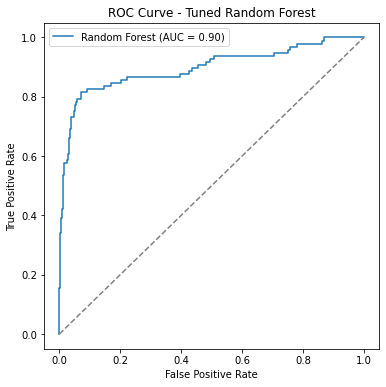

In [60]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_rf)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_best_rf):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()

Based on the provided information, the tuned Random Forest model demonstrates excellent performance with an AUC score of 0.90. This indicates a very high ability to distinguish between positive and negative classes. The model successfully achieves a high true positive rate while maintaining a relatively low false positive rate. Its performance is considered outstanding for a classification task. This result suggests the model is highly effective and reliable for its intended predictive purpose.

In [50]:
# Feature Importance

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
print(top_features)


total day minutes         0.266302
customer service calls    0.167611
international plan_yes    0.097897
total eve minutes         0.086057
total intl minutes        0.060816
total night minutes       0.055883
total day calls           0.044515
account length            0.043977
total eve calls           0.040969
total intl calls          0.040463
total night calls         0.040197
number vmail messages     0.031382
voice mail plan_yes       0.023932
dtype: float64


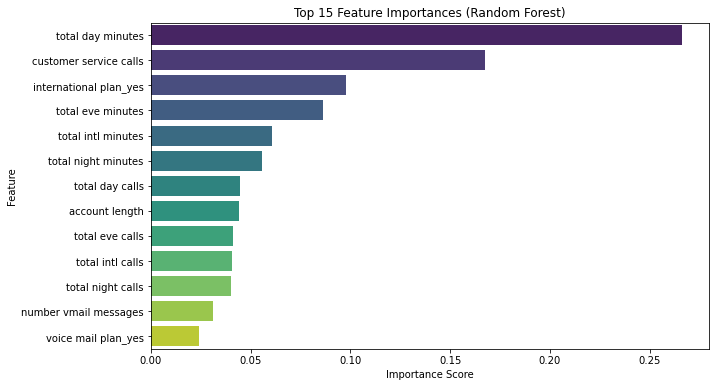

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

This list shows the feature importance scores from a machine learning model, ranking variables by their influence on its predictions. The most critical feature is "total day minutes," indicating a customer's daytime call duration is the strongest predictor of the target outcome. The high importance of "customer service calls" and "international plan_yes" suggests these are also major factors driving the model's decisions. Notably, the duration of calls is consistently more influential than the number of calls across all time periods. This analysis reveals which customer behaviors are most significant and provides actionable insight for business strategy.